In [4]:
import graphviz
import numpy as np
import pandas as pd

In [9]:
df = pd.read_csv('cores.csv', sep=';', decimal=',', na_values='#N/D', encoding='ANSI')
df.dropna(inplace=True)
df

,Década,Año,Continente,País,Line Group (Path ID),Point Order,Valor
0,1960,1968,África,Angola,1,1,0.000
1,1960,1968,África,Argelia,2,1,31.866
2,1960,1968,África,Benin,3,1,0.000
3,1960,1968,África,Camerún,4,1,0.000
4,1960,1968,África,Congo,5,1,0.000
...,...,...,...,...,...,...,...
3055,2020,2020,Oriente Medio,Yemen,58,1,0.000
3056,2020,2020,Oriente Medio,Otros OM,59,1,0.000
3057,2020,2020,Asia-Pacífico,China,61,1,0.000
3058,2020,2020,Asia-Pacífico,India,62,1,0.000


In [32]:
df_0 = df[df.Valor>100].groupby(['Continente', 'País']).Valor.sum().reset_index()
df_0[df_0.Continente=='África'].País

41               Angola
42              Argelia
43                Benin
44              Camerún
45                Congo
46               Egipto
47                Gabón
48    Guinea Ecuatorial
49                Libia
50              Nigeria
51         Otros África
52                Túnez
Name: País, dtype: object

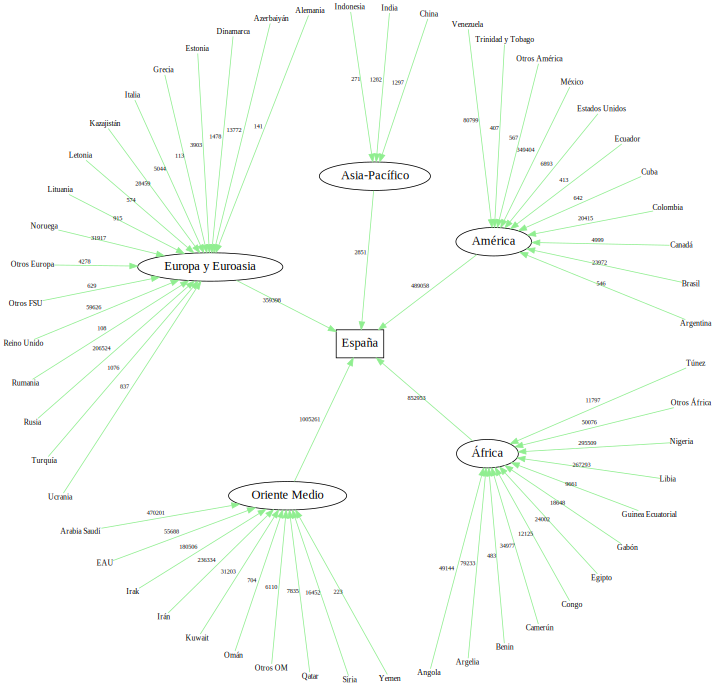

In [98]:
cores = graphviz.Digraph('cores', comment='Importación de Crudo en España (1968-2021)', engine='twopi', 
                         format='png', filename='cores', directory='D:/',
                         node_attr={'shape': 'plain', 'fontsize': '10'}, 
                         edge_attr={'fontsize': '8', 'color': "lightgreen"},
                         graph_attr={'nodesep': "1", 'ranksep': "3", 'size': "10"})

cores.node('ESP', 'España', _attributes={'shape': 'box', 'fontsize': '16'})
for i, c in np.ndenumerate(df_0.Continente.unique()):
    cores.node(str(i), c, _attributes={'shape': 'oval', 'fontsize': '16'})
    cores.edge(str(i), 'ESP', str(int(df_0[df_0.Continente==c].Valor.sum())))
    for j, p in np.ndenumerate(df_0[df_0.Continente==c].País):
        cores.node(str(i*100+j), p)
        cores.edge(str(i*100+j), str(i), str(int(df_0[df_0.País==p].Valor)))
        

cores

In [99]:
cores.view()

'D:/cores.png'